In [275]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import json
#import geopandas as gpd

# Electric vehicles analysis
### Electric cars more popular than ever, they now account for 30% of new car registrations in 2022


Over the last couple of years the electric car market has grown to become a US$561.3bn market worldwide. In the UK, the car market has increased steadily after the pandemic with around 600k electric cars now in the road, an increased from 100k in 2019 and  accounting for 2% of overall cars in the road. There are more electric cars than ever in the uk roads and this trend is likely to continue as consumers shift from diesel cars to less polluting cars.



In [276]:
#Import licence registration data
veh_licence=pd.read_csv('data/vehicle_licence_status_1994Q4_2023Q2.csv')
#Take a look to the dataframe
veh_licence.head(5)

,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2023Q3,2023Q2,2023Q1,2022Q4,...,2003Q4,2002Q4,2001Q4,2000Q4,1999Q4,1998Q4,1997Q4,1996Q4,1995Q4,1994Q4
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,Licensed,16,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,SORN,4,3,3,3,...,0,0,0,0,0,0,0,0,0,0
2,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,Licensed,26,27,25,24,...,0,0,0,0,0,0,0,0,0,0
3,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,SORN,2,1,2,3,...,0,0,0,0,0,0,0,0,0,0
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,Licensed,987,993,988,982,...,0,0,0,0,0,0,0,0,0,0


In [277]:
#Make a copy of the file
cars_licence=veh_licence.copy()
#Filter for only liceced vehicles
cars_licence=cars_licence[cars_licence['LicenceStatus']=='Licensed']
#Drop LicenceStatus colunm
cars_licence.drop(['LicenceStatus'],axis=1,inplace=True)
#Unpivot data to have the date as rows rather than columns
cars_licence=pd.melt(cars_licence,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Licences')
#Filter for only cars
cars_licence=cars_licence[cars_licence['BodyType']=='Cars']
#Add a column for the year
cars_licence['Year']=cars_licence['YearQuarter'].astype(str).str[:4]
#Add a column for the quarter
cars_licence['Quarter']=cars_licence['YearQuarter'].astype(str).str[-2:]
#Group some of the smaller categories of fuels into Other fuel type
cars_licence.loc[cars_licence['Fuel'].isin(['Gas','Range extended electric','Fuel cell electric']),'Fuel']='Other fuel types'
#Group petrol and diesel hybrids into the same category called hybrid
cars_licence.loc[cars_licence['Fuel'].isin(['Hybrid electric (diesel)','Hybrid electric (petrol)']),'Fuel']='Hybrid'
#Group plug in petrol and diesel into the same category called Plug in hybrid
cars_licence.loc[cars_licence['Fuel'].isin(['Plug-in hybrid electric (diesel)','Plug-in hybrid electric (petrol)']),'Fuel']='Plug-in hybrid'
#Show sample of the data
cars_licence.head(5)

,BodyType,Make,GenModel,Model,Fuel,YearQuarter,Licences,Year,Quarter
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,2023Q3,16,2023,Q3
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,2023Q3,26,2023,Q3
2,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,2023Q3,987,2023,Q3
3,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR AUTO,Petrol,2023Q3,658,2023,Q3
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER SCORPIONE MULTIAIR,Petrol,2023Q3,60,2023,Q3


In [278]:
#Creat copy of dataframe
fuel_licence=cars_licence.copy()
#Filter for years between 2015 and 2022
fuel_licence=fuel_licence[(fuel_licence['Year'].astype(int)>2014)&(fuel_licence['Year'].astype(int)<2023)&(fuel_licence['Quarter']=='Q4')]
#Group by Fuel and Total Licences
fuel_licence=fuel_licence.groupby(['Fuel','Year'])['Licences'].sum().reset_index(['Fuel','Year'])
#Take a look to the first 10 rows of the dataframe
fuel_licence.head(10)

,Fuel,Year,Licences
0,Battery electric,2015,20472
1,Battery electric,2016,29086
2,Battery electric,2017,41222
3,Battery electric,2018,55338
4,Battery electric,2019,89581
5,Battery electric,2020,191596
6,Battery electric,2021,374597
7,Battery electric,2022,620632
8,Diesel,2015,11428664
9,Diesel,2016,12051932


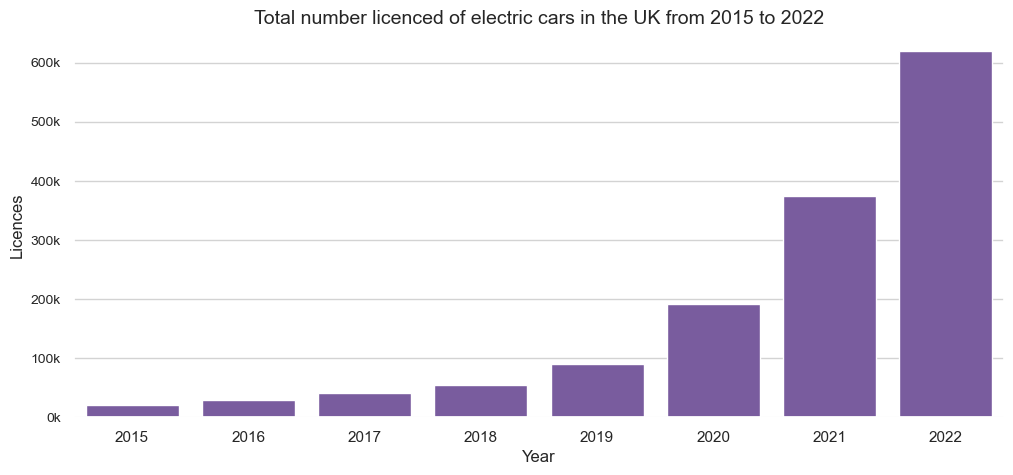

In [279]:
#Set size of the graph
fig=plt.figure(figsize=(12,5))
#Filter only for electric cars
total_electric=fuel_licence[fuel_licence['Fuel']=='Battery electric']
#Start the labels for the y axis
y_ticks=range(0,700,100)
#Set the title of the graph
plt.title('Total number licenced of electric cars in the UK from 2015 to 2022',size=14)
#Set the colour of the background
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'white'})
#Create bar plot
ax=sns.barplot(data=total_electric,x='Year',y='Licences',color='#7851a9')
#Change colour of grid lines for the y axis
ax.grid(color='lightgrey',axis='y')
#Add % sign to the y axis labels and change fontsize
ax.set_yticklabels(list(str(i) + 'k' for i in y_ticks),fontsize=10);
#Save figure
fig.savefig('graphs/total number licenced of electric cars in the UK.png')

# New vehicles registrations 
### Electric cars now more popular than diesel cars

In [280]:
#Import vehicle registration data
veh_reg=pd.read_csv('data/vehicle_registration_2014Q3_2023Q2.csv')
#Check shape and given shape has 42 columns, for the purposes of visualisation I will unpivot the file
veh_reg.shape

(53195, 41)

In [281]:
#We have the reference information about the vehicles in the first 5 columns and the time information afterwwards
veh_reg.head()

,BodyType,Make,GenModel,Model,Fuel,2023Q2,2023Q1,2022Q4,2022Q3,2022Q2,...,2016Q4,2016Q3,2016Q2,2016Q1,2015Q4,2015Q3,2015Q2,2015Q1,2014Q4,2014Q3
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,0,0,0,0,0,...,59,100,0,0,0,0,0,0,0,0
3,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR AUTO,Petrol,0,0,0,0,0,...,10,26,0,0,0,0,0,0,0,0
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER SCORPIONE MULTIAIR,Petrol,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [282]:
#Unpivot the file and run the info function to check if there are any null values and check data types
pd.melt(veh_reg,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Registration').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915020 entries, 0 to 1915019
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   BodyType      object
 1   Make          object
 2   GenModel      object
 3   Model         object
 4   Fuel          object
 5   YearQuarter   object
 6   Registration  int64 
dtypes: int64(1), object(6)
memory usage: 102.3+ MB


In [283]:
#Checking the number of registration by body type and cars have by far the largest number of registrations 
pd.melt(veh_reg,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Registration').groupby(['BodyType'])['Registration'].sum()

BodyType
Buses and coaches          65379
Cars                    19847035
Heavy goods vehicles      437870
Light goods vehicles     3188722
Motorcycles              1103981
Other vehicles            494821
Name: Registration, dtype: int64

In [284]:
#Make a copy of the file
cars_data=veh_reg.copy()
#Unpivot data to have the date as rows rather than columns
cars_data=pd.melt(cars_data,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Registration')
#Filter for only cars
cars_data=cars_data[cars_data['BodyType']=='Cars']
#Add a column for the year
cars_data['Year']=cars_data['YearQuarter'].astype(str).str[:4]
#Add a column for the quarter
cars_data['Quarter']=cars_data['YearQuarter'].astype(str).str[-2:]
#Group some of the smaller categories of fuels into Other fuel type
cars_data.loc[cars_data['Fuel'].isin(['Gas','Range extended electric','Fuel cell electric']),'Fuel']='Other fuel types'
#Group petrol and diesel hybrids into the same category called hybrid
cars_data.loc[cars_data['Fuel'].isin(['Hybrid electric (diesel)','Hybrid electric (petrol)']),'Fuel']='Hybrid'
#Group plug in petrol and diesel into the same category called Plug in hybrid
cars_data.loc[cars_data['Fuel'].isin(['Plug-in hybrid electric (diesel)','Plug-in hybrid electric (petrol)']),'Fuel']='Plug-in hybrid'
#Change name of battery electric to electric
cars_data.loc[cars_data['Fuel'].isin(['Battery electric']),'Fuel']='Electric'
#Show sample of the data
cars_data.sample(10)

,BodyType,Make,GenModel,Model,Fuel,YearQuarter,Registration,Year,Quarter
964541,Cars,CITROEN,CITROEN DS,DS 21 PALLAS,Petrol,2018Q4,1,2018,Q4
215709,Cars,BMW,BMW 1 SERIES,116D SE BUSINESS,Diesel,2022Q2,0,2022,Q2
1118106,Cars,AUDI,AUDI A3,A3 S LINE TFSI,Petrol,2018Q1,934,2018,Q1
1636730,Cars,SEAT,SEAT EXEO,EXEO SE TECH TDI CR,Petrol,2015Q4,0,2015,Q4
612881,Cars,MAZDA,MAZDA 3,3 SPORT DIESEL,Diesel,2020Q3,0,2020,Q3
1015614,Cars,BMW,BMW X5,X5 M COMPETITION FIRST ED A,Petrol,2018Q3,0,2018,Q3
941174,Cars,PEUGEOT,PEUGEOT HORIZON,HORIZON S AC,Petrol,2019Q1,0,2019,Q1
1724574,Cars,JINLING,JINLING MODEL MISSING,MISSING,Petrol,2015Q2,0,2015,Q2
118921,Cars,FIAT,FIAT TIPO,TIPO CROSS GARMIN MHEV S-A,Petrol,2022Q4,0,2022,Q4
623279,Cars,PORSCHE,PORSCHE CAYMAN,CAYMAN S-A,Petrol,2020Q3,0,2020,Q3


In [285]:
#Group data by fuel and year 
fuel_registration=cars_data.groupby(['Fuel','Year'])['Registration'].sum().reset_index(['Fuel','Year'])
#Filter out 2014 and 2023
fuel_registration=fuel_registration[~fuel_registration['Year'].isin(['2014','2023'])]
#Change data to thousands
fuel_registration['Registration']=fuel_registration['Registration']/1000

In [286]:
# Create function to create palettes for my graphs
def custom_palette(df,colours,hue):
    hue_values=sorted(df[hue].unique())
    colours=colours
    colour_palette={}
    if abs(len(hue_values)-len(colours))>0:
        raise Exception(f'Length of colours and categories must match: Colour lenght is {len(colours)}, category length is {len (hue_values)}')
    else:
        for colour,hue in zip(colours,hue_values):
            colour_palette[hue]=colour
        return colour_palette


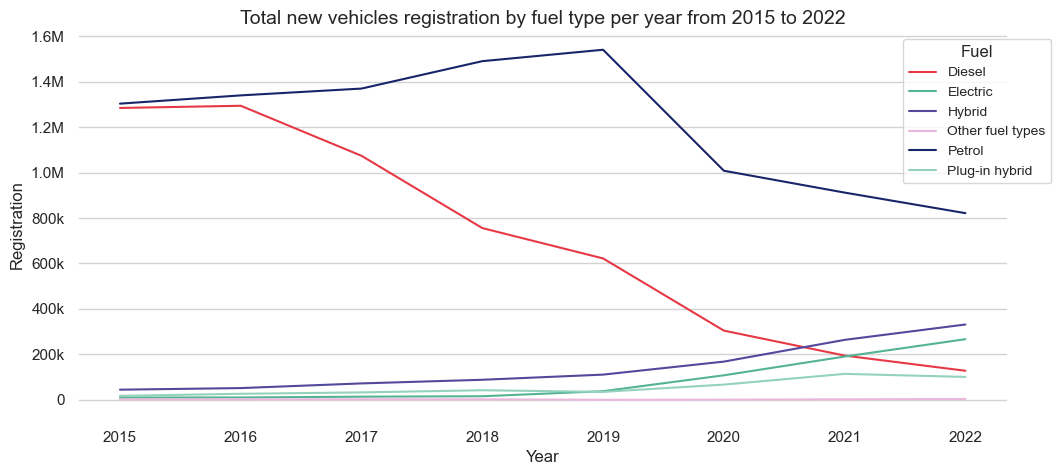

In [287]:
#Set the palette for the graphs
colours=['#E63946','#54B393','#52489C','#EBB8DD','#182568','#94d2bd']
new_palette=custom_palette(market_share,colours,hue='Fuel')

#Plot information
fig=plt.figure(figsize=(12,5))
plt.title('Total new vehicles registration by fuel type per year from 2015 to 2022',size=14);
ax=sns.lineplot(data=fuel_registration,x='Year',y='Registration',hue='Fuel',hue_order=sorted(market_share['Fuel'].unique()),
                errorbar=None,palette=new_palette)
#Set the colour 
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'white'})
sns.move_legend(ax, "upper left",title='Fuel',fontsize=10, bbox_to_anchor=(0.88, 1))
#Change colour of grid lines for the y axis
ax.grid(color='lightgrey',axis='y')
y_ticks=['0','0','200k','400k','600k','800k','1.0M','1.2M','1.4M','1.6M']
ax.set_yticklabels(y_ticks)

fig.savefig('graphs/Car registrations by fuel type.png')

The shift in consumer behavior has been shiftly, in 2016 there was a complete dominance of petrol and diesel vehicles with a 50/50 split on the total number of cars but now diesel vehicles only account for less than 10% of new registrations and for the first time in 2021 there were more new registration of electric cars than diesel.

# Car Models
### Manufacturers offer greater choice to consumers

In [288]:
#Group data by Make and Generic Model
models_reg=cars_data.groupby(by=['Make','GenModel','Fuel','Year'])['Registration'].sum().reset_index(level=['Make','Fuel','Year','GenModel'])
#Filter out rows with 0 registration or where the generic model is missing
models_reg=models_reg.loc[(models_reg['Registration']>0) & (~models_reg['GenModel'].str.contains('MODEL MISSING'))]

In [289]:
#Count number of Generic Models registered by year and fuel
make_reg=models_reg.groupby(by=['Fuel','Year'])['GenModel'].agg(['count']).reset_index(level=['Fuel','Year'])
#Rename column
make_reg.rename(columns={'count':'CountModels'},inplace=True)
#Filter out fuel types that are not electric or plug in hybrid
make_reg=make_reg.loc[(~make_reg['Fuel'].isin(['Hybrid','Other fuel types','Diesel','Petrol'])) & (make_reg['Year'].isin(['2017','2018','2019','2020','2021','2022'])) ]
#Soort values by Year
make_reg=make_reg.sort_values(by=['Year','CountModels','Fuel'])
#Pivot table
make_reg=make_reg.pivot_table(values='CountModels',index='Year',columns='Fuel')
#Take a look to the first 10 rows
make_reg.head(5)

Fuel,Electric,Plug-in hybrid
Year,,
2017,19,29
2018,21,32
2019,28,34
2020,44,67
2021,63,83


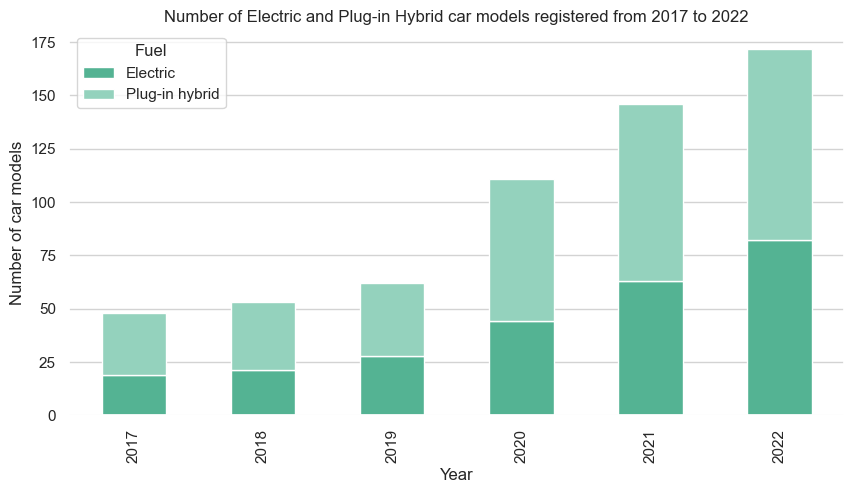

In [290]:
#Create stacked bar plot
ax=make_reg.plot(kind='bar',stacked=True,color=['#54B393','#94d2bd'],figsize=(10,5),
                 ylabel='Number of car models',
                 title='Number of Electric and Plug-in Hybrid car models registered from 2017 to 2022');
ax.grid(color='lightgrey',axis='y')
#Save graph
fig = ax.get_figure()
fig.savefig('graphs/total number Electric and Plug-in Hybrid car modles in the UK.png')

# Car registrations by Region
### Nearly half of electric cars are registered in Southern England

In [291]:
#Upload licence data by geography
veh_licence_geo=pd.read_csv('data/vehicle_licences_region.csv')
#Take a look to the first 10 rows
veh_licence_geo.head(10)

,ONS Code,ONS Region,ONS Upper Tier Local Authority,ONS Lower Tier Local Authority,Units,Body type,Fuel,CO2 band (g/km) [note 3],Keepership,Year of first registration [note 4],Number
0,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2012,1
1,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2015,1
2,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2016,1
3,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2017,1
4,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2018,2
5,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2019,4
6,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2020,10
7,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2021,19
8,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2022,38
9,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2023,53


In [292]:
#Take a look to the information of the dataframe
veh_licence_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483706 entries, 0 to 483705
Data columns (total 11 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   ONS Code                             483706 non-null  object
 1   ONS Region                           483706 non-null  object
 2   ONS Upper Tier Local Authority       483706 non-null  object
 3   ONS Lower Tier Local Authority       483706 non-null  object
 4   Units                                483706 non-null  object
 5   Body type                            483706 non-null  object
 6   Fuel                                 483706 non-null  object
 7   CO2 band (g/km) [note 3]             483706 non-null  object
 8   Keepership                           483706 non-null  object
 9   Year of first registration [note 4]  483706 non-null  int64 
 10  Number                               483706 non-null  object
dtypes: int64(1), object(10)
me

In [293]:
# Number column is an object and needs to be converted to integer

#Create a function to check if a particular column can be converted to integer which return error values
def int_check(df,column):
    '''
    df: A dataframe object
    Column:Integer index of the column to check if it can be converted to integer
    '''
    length=df.iloc[:,column]
    errors=[]
    for i in length:
        try:
            int(i)
        except ValueError:
            errors.append(i)
    return errors


In [294]:
#Apply the function to the numbers column
err=int_check(veh_licence_geo,10)
#Check first 10 values to see which values can cause errors, we need to remove commas from the values
print(err[0:10])


['1,013', '1,113', '1,241', '1,033', '1,159', '1,081', '1,087', '1,035', '1,286', '1,364']


In [295]:
veh_licence_geo['Number']=veh_licence_geo['Number'].replace(",","",regex=True)
#Apply the check function to the numbers column again
err=int_check(veh_licence_geo,10)
#Error list is now empty so we can proceed with to cast the column to integer
print(err)
#Cast Number column to integers
veh_licence_geo['Number']=veh_licence_geo['Number'].astype(int)

[]


In [296]:
#Copy dataframe
cars_licence_geo=veh_licence_geo.copy()
#Filter for only cars
cars_licence_geo=cars_licence_geo[cars_licence_geo['Body type']=='Cars']
#Remove 2023 data for now
cars_licence_geo=cars_licence_geo[cars_licence_geo['Year of first registration [note 4]']!=2023]


In [297]:
#Create copy of dataframe
fuel_licence_geo=cars_licence_geo.copy()
#Group dataframe by fuel type and region
fuel_licence_geo=fuel_licence_geo.groupby(['ONS Region','Fuel'])['Number'].sum().reset_index(['ONS Region','Fuel'])
#Change names of battery electric, hybrid electric (combined) and plug in hybrid electric (combined)
fuel_licence_geo.loc[fuel_licence_geo['Fuel']=='Battery electric','Fuel']='Electric'
fuel_licence_geo.loc[fuel_licence_geo['Fuel']=='Hybrid electric (combined)','Fuel']='Hybrid'
fuel_licence_geo.loc[fuel_licence_geo['Fuel']=='Plug-in hybrid electric (combined)','Fuel']='Plug-in hybrid'
#Get the unique list of regions
regions=fuel_licence_geo['ONS Region'].unique()
#Loop to calculate the percentage of cars by fuel type for each region
for i in regions:
    total=fuel_licence_geo.loc[fuel_licence_geo['ONS Region']==i,'Number'].sum()
    fuel_licence_geo.loc[fuel_licence_geo['ONS Region']==i,'Percentage']=(fuel_licence_geo.loc[fuel_licence_geo['ONS Region']==i,'Number']/total)*100
#Drop other fuel types
fuel_licence_geo=fuel_licence_geo[fuel_licence_geo['Fuel']!='Other fuel types' ]
#Check first 10 rows of the dataframe
fuel_licence_geo.head(10)

,ONS Region,Fuel,Number,Percentage
0,East,Electric,53363,1.612160
1,East,Diesel,1121130,33.870670
2,East,Hybrid,119101,3.598183
4,East,Petrol,1969244,59.493201
5,East,Plug-in hybrid,44772,1.352615
6,East Midlands,Electric,29786,1.221610
7,East Midlands,Diesel,963334,39.509125
8,East Midlands,Hybrid,81279,3.333488
10,East Midlands,Petrol,1340039,54.958891
11,East Midlands,Plug-in hybrid,22090,0.905975


In [298]:
#Get only the information for electric cars
electric_geo=fuel_licence_geo[fuel_licence_geo['Fuel']=='Electric']
electric_geo.drop(['Fuel'],axis=1,inplace=True)
electric_geo.rename(columns={'ONS Region':'Region','Number':'Number of Electric Cars'},inplace=True)
electric_geo.sort_values(by='Number of Electric Cars',ascending=False,inplace=True)
#electric_geo.loc[electric_geo['Region']=='Yorkshire and The Humber','Region']='Yorkshire'
electric_geo['Number of Electric Cars']=electric_geo['Number of Electric Cars']/1000
electric_geo.head(12)

,Region,Number of Electric Cars,Percentage
42,South East,135.008,2.643465
48,South West,93.916,2.941316
24,North West,81.111,2.356454
12,London,70.348,2.818329
0,East,53.363,1.612160
66,Yorkshire and The Humber,46.066,1.816914
36,Scotland,40.028,1.636078
60,West Midlands,33.210,1.177366
6,East Midlands,29.786,1.221610
54,Wales,14.093,0.898932


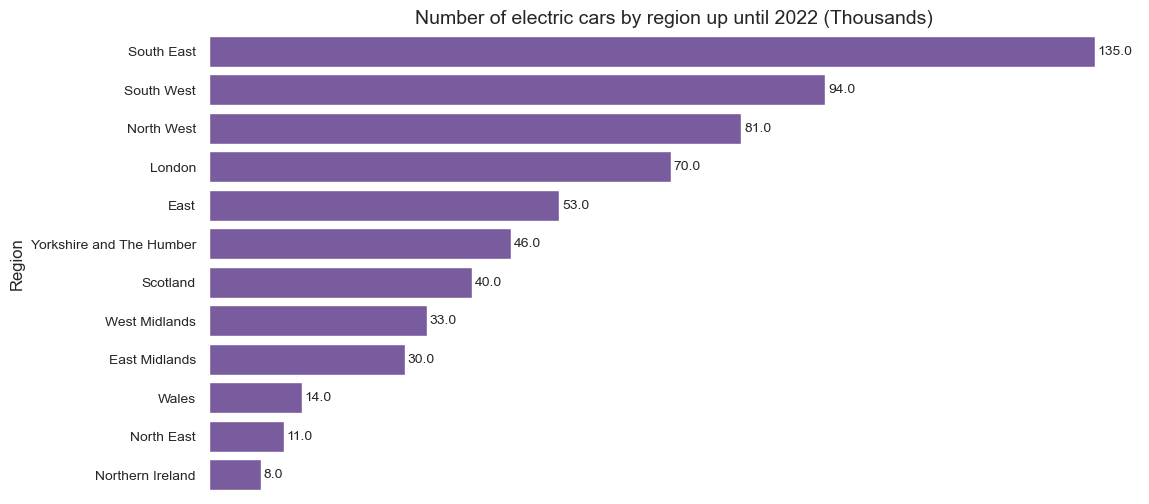

In [299]:
fig=plt.figure(figsize=(12,6))
plt.title('Number of electric cars by region up until 2022 (Thousands)',size=14);
#Plot bar chart and add palette
ax=sns.barplot(data=electric_geo,x='Number of Electric Cars',y='Region',color='#7851a9')
#Change fontsize of y labels
ax.set_yticklabels(electric_geo['Region'].unique(),fontsize=10)
#Round values and set font size of bar labels
labels=list(round(electric_geo['Number of Electric Cars'],0))
ax.bar_label(ax.containers[0],labels=labels,padding=2,fontsize=10)
#Remove x axis labels and legend
ax.get_xaxis().set_ticks([])
ax.set(xlabel=None)
#Save graph
fig.savefig('graphs/Number of electric cars by region.png');


# Income by Region in the UK
### Price is one of the barriers for consumers to switch to electric cars

In [300]:
#Import the weekly income data 
weekly_income_uk=pd.read_csv('data/weekly_income_region_uk_2002_2023.csv')
#Take a look to the first 10 rows of the file
weekly_income_uk.head(10)

,Region,2002,2003,2004,2004.1,2005,2006,2006.1,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,2021.1,2022,2023
0,United Kingdom,391,404,423,419,431,446,444,458,479,...,527,539,550,568,585,586,611,610,642,682
1,North East,343,351,373,369,383,393,392,401,422,...,486,492,504,511,531,525,547,547,581,614
2,North West,370,383,400,395,410,422,420,434,451,...,492,503,515,530,556,558,578,575,604,649
3,Yorkshire and The Humber,360,376,395,392,400,415,413,426,444,...,481,498,502,520,541,540,569,567,595,632
4,East Midlands,370,386,398,392,412,425,423,430,450,...,491,502,517,530,548,563,573,572,604,640
5,West Midlands,366,379,397,393,405,420,416,431,450,...,492,508,517,536,551,552,582,579,615,652
6,East,416,432,453,448,457,469,466,480,499,...,551,570,575,589,610,608,573,626,670,706
7,London,480,496,515,510,527,539,538,556,582,...,621,632,654,671,699,714,728,732,767,796
8,South East,435,451,469,462,469,488,487,502,525,...,575,582,596,615,636,629,660,660,689,724
9,South West,367,384,401,397,406,423,421,433,452,...,498,513,527,538,561,559,577,576,622,664


In [301]:
#Calculate yearly income for year 2022 (approximate year to 52 weeks)
year_income_2022=weekly_income_uk[['Region','2022']].copy()
year_income_2022['year_2022']=year_income_2022['2022']*52
year_income_2022.drop('2022',axis=1,inplace=True)
year_income_2022.sort_values(by='year_2022',ascending=False,inplace=True)
year_income_2022.head(10)

,Region,year_2022
7,London,39884
8,South East,35828
6,East,34840
0,United Kingdom,33384
11,Scotland,33332
9,South West,32344
5,West Midlands,31980
2,North West,31408
4,East Midlands,31408
10,Wales,31408


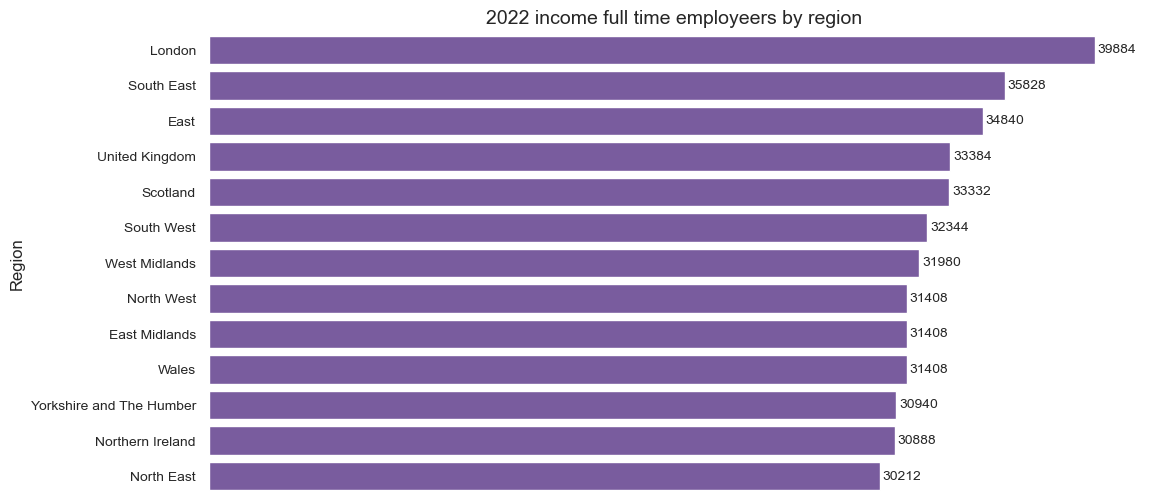

In [302]:
fig=plt.figure(figsize=(12,6))
plt.title('2022 income full time employeers by region',size=14);
#Plot bar chart and add paletter
ax=sns.barplot(data=year_income_2022,x='year_2022',y='Region',color='#7851a9')
ax.set_yticklabels(year_income_2022['Region'].unique(),fontsize=10)
ax.bar_label(ax.containers[0],padding=2,fontsize=10)
ax.get_xaxis().set_ticks([])
ax.set(xlabel=None)
fig.savefig('graphs/2022 income full time employeers by region.png');

# Chargers by Regions in the UK
### Electric chargers infrastructure is concetrated to London with around 35% of total chargers located in the capital

In [303]:
#Import total chargers information
total_chargers_raw=pd.read_csv('data/total_chargers_uk_jan_2023.csv')
#Take a look to the first 10 rows
total_chargers_raw.head(10)

,Local Authority / Region Code,Local Authority / Region Name,Jan-23 \n(Total Charging Devices) [Note 2],"Jan-23 \n(per 100,000 population) [Note 3]",Oct-22\n(Total Charging Devices),"Oct-22\n(per 100,000 population)",July-22 \n(Total Charging Devices),"July-22 \n(per 100,000 population)",Apr-22 \n(Total Charging Devices),"Apr-22 \n(per 100,000 population)",...,Oct-20 \n(Total Charging Devices),"Oct-20 \n(per 100,000 population)",July-20 \n(Total Charging Devices),"July-20 \n(per 100,000 population)",Apr-20 \n(Total Charging Devices),"Apr-20 \n(per 100,000 population)",Jan-20 \n(Total Charging Devices),"Jan-20 \n(per 100,000 population)",Oct-19 \n(Total Charging Devices),"Oct-19 \n(per 100,000 population)"
0,K02000001,United Kingdom,"37,055",55.3,"34,637",51.6,"32,011",47.7,"30,290",45.2,...,"19,487",29.2,"18,265",27.3,"17,947",27.0,"16,505",24.8,"15,116",22.8
1,K03000001,Great Britian,"36,689",56.3,"34,295",52.6,"31,683",48.6,"29,942",45.9,...,"19,169",29.5,"17,953",27.7,"17,642",27.3,"16,210",25.1,"14,821",23.0
2,E92000001,England,"31,466",55.7,"29,774",52.7,"27,502",48.6,"25,884",45.8,...,"16,456",29.2,"15,395",27.3,"14,979",26.8,"13,719",24.5,"12,549",22.4
3,E12000001,North East,"1,253",47.3,"1,142",42.6,"1,155",43.1,"1,011",37.7,...,849,31.8,812,30.4,786,29.6,752,28.3,738,27.8
4,E06000047,County Durham,229,43.9,206,38.6,174,32.6,149,27.9,...,106,20.0,105,19.8,102,19.4,96,18.2,92,17.5
5,E06000005,Darlington,68,62.8,54,50.3,49,45.6,31,28.9,...,29,27.2,28,26.2,28,26.3,27,25.3,27,25.3
6,E06000001,Hartlepool,24,25.9,8,8.5,11,11.7,12,12.8,...,6,6.4,6,6.4,6,6.4,5,5.4,5,5.4
7,E06000002,Middlesbrough,51,35.5,33,23.4,38,26.9,34,24.1,...,29,20.6,29,20.6,29,20.6,27,19.2,25,17.8
8,E06000057,Northumberland,251,78.1,220,67.9,226,69.8,198,61.1,...,162,50.2,152,47.1,149,46.5,138,43.1,139,43.4
9,E06000003,Redcar and Cleveland,37,27.1,45,32.8,40,29.1,36,26.2,...,24,17.5,20,14.6,20,14.6,17,12.4,17,12.4


In [304]:
#it looks the totals of the regions in england start with E12
regions_uk=list(total_chargers_raw.loc[(total_chargers_raw['Local Authority / Region Code'].str.contains('E12')),
                   'Local Authority / Region Name'])
regions_uk.extend(['Wales','Scotland','Northern Ireland'])

print(regions_uk)

['North East', 'North West', 'Yorkshire and the Humber', 'East Midlands', 'West Midlands', 'East of England', 'London', 'South East', 'South West', 'Wales', 'Scotland', 'Northern Ireland']


In [305]:
#Copy dataset
total_chargers=total_chargers_raw.copy()
#Get only the two columns needed region and total number of chargers in Oct 2022
total_chargers=total_chargers.iloc[:, lambda total_chargers: [1,4,28]]
#Filter for regions in the UK
total_chargers=total_chargers[total_chargers['Local Authority / Region Name'].isin(regions_uk)]
#Remove comma to convert values to integer
total_chargers.replace(to_replace=',',value='',inplace=True,regex=True)
#Conver to integer
total_chargers['Oct-22\n(Total Charging Devices)']=total_chargers['Oct-22\n(Total Charging Devices)'].apply(pd.to_numeric)
total_chargers['Oct-19 \n(Total Charging Devices)']=total_chargers['Oct-19 \n(Total Charging Devices)'].apply(pd.to_numeric)

#Sort values by the number of chargers
total_chargers.sort_values(by='Oct-22\n(Total Charging Devices)',ascending=False,inplace=True)

total_chargers.head(5)

,Local Authority / Region Name,Oct-22\n(Total Charging Devices),Oct-19 \n(Total Charging Devices)
220,London,11028,4360
256,South East,4562,1966
384,Scotland,3272,1743
134,West Midlands,2516,815
327,South West,2388,1150


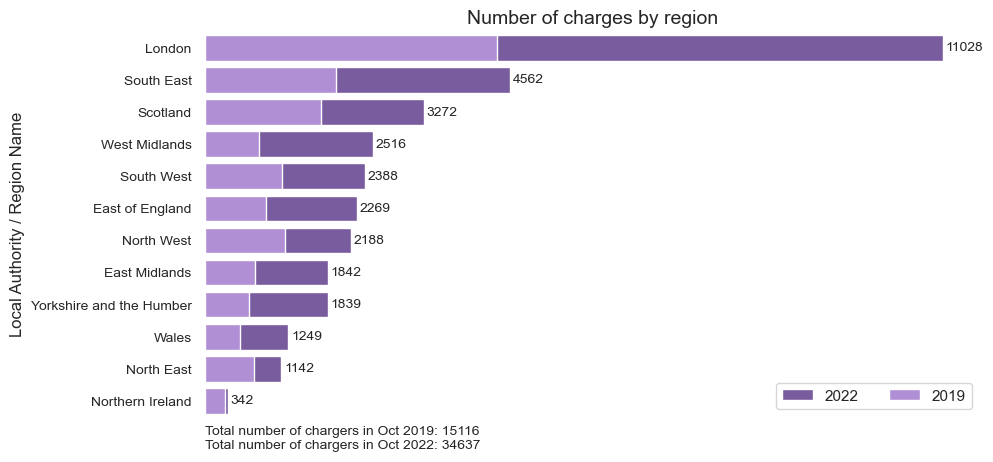

In [306]:
data=total_chargers
total_2019=total_chargers['Oct-19 \n(Total Charging Devices)'].sum()
total_2022=total_chargers['Oct-22\n(Total Charging Devices)'].sum()
fig=plt.figure(figsize=(10,5));
plt.title('Number of charges by region',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'white'})
ax=sns.barplot(data,x='Oct-22\n(Total Charging Devices)',y='Local Authority / Region Name',color='#7851a9',label='2022')
ax=sns.barplot(data,x='Oct-19 \n(Total Charging Devices)',y='Local Authority / Region Name',color='#af83e1',label='2019')

ax.set_yticklabels(data['Local Authority / Region Name'].unique(),fontsize=10)
ax.bar_label(ax.containers[0],padding=2,fontsize=10)
ax.get_xaxis().set_ticks([])
ax.set(xlabel=None)
ax.legend(ncols=2,loc='lower right',frameon=True)
ax.text(0,12.5,f'Total number of chargers in Oct 2019: {total_2019} \nTotal number of chargers in Oct 2022: {total_2022}',fontsize=10)
fig.savefig('graphs/Number of chargers by region.png')

In [307]:
raise Exception('cells are not ruuning beyond this point')

Exception: cells are not ruuning beyond this point

# Graveyard
## Sample code to be deleted at the end

In [ ]:
total_reg_year=fuel_registration.groupby(['Year'])['Registration'].sum().reset_index(['Year'])
total_reg_year.rename(columns={'Registration':'TotalRegistrations'},inplace=True)
total_reg_year

In [ ]:
years=total_reg_year['Year'].to_list()
market_share=pd.merge(fuel_registration,total_reg_year,how='left',on='Year')
market_share['MarketShare']= market_share['Registration']*100/market_share['TotalRegistrations']
market_share.head(10)

In [ ]:
#Set colours of fuel categories
colours=['#E63946','#54B393','#52489C','#182568','#94d2bd']
#Use paletter function to define the colours
palette=custom_palette(fuel_licence_geo,colours,hue='Fuel')
#Get the regions to plot (categories)
regions=fuel_licence_geo['ONS Region'].unique()
#Set the steps in the y axis
y_ticks=np.arange(0, 72, 4)
#Start subplots
fig,axs=plt.subplots(3,4,figsize=(18,18),sharey=True)
#Add title
fig.suptitle('Percentage of cars by fuel type for each region in the UK',fontsize=12)
#Tight layout to make sure subplots do not overlap
fig.tight_layout()
#Adjust space between subplots and top of figure and height space between subplots
fig.subplots_adjust(top=0.95,hspace=0.2)
#Start loop to plot percentage of cars by fuel type per region in the UK
for ax,region in zip(axs.reshape([12,1]),regions):
    #Filter value for each region and sort values descending order for that region
    data=fuel_licence_geo[fuel_licence_geo['ONS Region']==region].sort_values(by='Percentage',ascending=False)
    #Plot bar chart and add paletter
    sns.barplot(data=data,x='Fuel',y='Percentage',ax=ax[0],palette=palette);
    #Change background colour of graphs
    ax[0].set_facecolor('white')
    #Change colour of grid lines for the y axis
    ax[0].grid(color='lightgrey',axis='y')
    #Add title to each plot
    ax[0].set_title(f'{region} Region',fontsize=10)
    #Change font size of x label
    #ax[0].set_xticks(data['Fuel'].unique())
    ax[0].set_xticklabels(data['Fuel'].unique(),fontsize=8)
    #Remove title of x axis
    ax[0].set(xlabel=None)
    #Add label to y axis
    ax[0].set_ylabel('Percentage',fontsize=10)
    #Set y axis steps
    ax[0].set_yticks(y_ticks)
    #Add % sign to the y axis labels and change fontsize
    ax[0].set_yticklabels(list(str(i) + '%' for i in y_ticks),fontsize=8);

In [ ]:
top_brands=cars_data[(cars_data['Year'].isin(['2017','2018','2019','2020','2021','2022']) & (cars_data['Fuel']=='Electric'))].groupby(by=['Make'])['Registration'].sum().sort_values(ascending=False)
top_brands=list(top_brands[:10].index)
print(top_brands)

['TESLA', 'VOLKSWAGEN', 'NISSAN', 'KIA', 'BMW', 'HYUNDAI', 'MG', 'AUDI', 'MERCEDES', 'RENAULT']


In [ ]:
#Make a copy of the file
cars_licence=veh_licence.copy()
#Filter for only liceced vehicles
cars_licence=cars_licence[cars_licence['LicenceStatus']=='Licensed']
#Drop LicenceStatus colunm
cars_licence.drop(['LicenceStatus'],axis=1,inplace=True)
#Unpivot data to have the date as rows rather than columns
cars_licence=pd.melt(cars_licence,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Licences')
#Filter for only cars
cars_licence=cars_licence[cars_licence['BodyType']=='Cars']
#Add a column for the year
cars_licence['Year']=cars_licence['YearQuarter'].astype(str).str[:4]
#Add a column for the quarter
cars_licence['Quarter']=cars_licence['YearQuarter'].astype(str).str[-2:]
#Group some of the smaller categories of fuels into Other fuel type
cars_licence.loc[cars_licence['Fuel'].isin(['Gas','Range extended electric','Fuel cell electric']),'Fuel']='Other fuel types'
#Group petrol and diesel hybrids into the same category called hybrid
cars_licence.loc[cars_licence['Fuel'].isin(['Hybrid electric (diesel)','Hybrid electric (petrol)']),'Fuel']='Hybrid'
#Group plug in petrol and diesel into the same category called Plug in hybrid
cars_licence.loc[cars_licence['Fuel'].isin(['Plug-in hybrid electric (diesel)','Plug-in hybrid electric (petrol)']),'Fuel']='Plug-in hybrid'
#Show sample of the data
cars_licence.head(10)

,BodyType,Make,GenModel,Model,Fuel,YearQuarter,Licences,Year,Quarter
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,2023Q3,16,2023,Q3
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,2023Q3,26,2023,Q3
2,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,2023Q3,987,2023,Q3
3,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR AUTO,Petrol,2023Q3,658,2023,Q3
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER SCORPIONE MULTIAIR,Petrol,2023Q3,60,2023,Q3
5,Cars,ABARTH,ABARTH 500,500,Petrol,2023Q3,3863,2023,Q3
6,Cars,ABARTH,ABARTH 500,500 C,Petrol,2023Q3,150,2023,Q3
7,Cars,ABARTH,ABARTH 500,500 C S-A,Petrol,2023Q3,376,2023,Q3
8,Cars,ABARTH,ABARTH 500,500 CUSTOM,Petrol,2023Q3,337,2023,Q3
9,Cars,ABARTH,ABARTH 500,500 CUSTOM S-A,Petrol,2023Q3,96,2023,Q3


In [ ]:
'''map_data[~map_data['EER13NM'].isin(list(total_charging_devices['Local Authority / Region Name'].unique()))]'''

,id,EER13CD,EER13CDO,EER13NM,geometry


In [ ]:
'''rapid_charging_devices[(~rapid_charging_devices['Local Authority / Region Code'].isin(list(map_data['id'].unique())))&
                       (rapid_charging_devices['Local Authority / Region Code'].str.contains('E'))&
                      (rapid_charging_devices['Year']=='2023')]'''

,Local Authority / Region Code,Local Authority / Region Name,Year,RapidChargingDevices
74,E06000061,North Northamptonshire (from April 2021),2023,23.0
77,E06000062,West Northamptonshire (from April 2021),2023,57.0
185,E07000244,East Suffolk,2023,10.0
188,E07000245,West Suffolk,2023,33.0
234,E06000060,Buckinghamshire,2023,41.0
287,E06000058,"Bournemouth, Christchurch and Poole",2023,48.0
290,E06000059,Dorset,2023,34.0
314,E07000246,Somerset West and Taunton,2023,11.0


In [ ]:
'''total_chargers_2023=total_charging_devices[total_charging_devices['Year']=='2023'].drop('Year',axis=1)
total_chargers_2023'''

,Local Authority / Region Code,Local Authority / Region Name,ChargingDevices
0,E12000001,North East,1253
1,E12000002,North West,2316
2,E12000003,Yorkshire and The Humber,1946
3,E12000004,East Midlands,1903
4,E12000005,West Midlands,2825
5,E12000006,Eastern,2380
6,E12000007,London,11521
7,E12000008,South East,4804
8,E12000009,South West,2518


In [ ]:
'''geo_total_chargers=map_data.merge(total_chargers_2023,left_on='EER13NM',right_on='Local Authority / Region Name',how='left')
geo_total_chargers.drop(['Local Authority / Region Code','Local Authority / Region Name'],axis=1,inplace=True)
geo_total_chargers'''

,id,EER13CD,EER13CDO,EER13NM,geometry,ChargingDevices
0,E15000001,E15000001,01,North East,"MULTIPOLYGON (((-1.22526 54.62585, -1.22444 54...",1253
1,E15000002,E15000002,02,North West,"MULTIPOLYGON (((-3.20537 53.37165, -3.20373 53...",2316
2,E15000003,E15000003,03,Yorkshire and The Humber,"MULTIPOLYGON (((-0.55349 53.69040, -0.54613 53...",1946
3,E15000004,E15000004,04,East Midlands,"MULTIPOLYGON (((0.26883 52.81561, 0.26392 52.8...",1903
4,E15000005,E15000005,05,West Midlands,"POLYGON ((-1.81356 53.13258, -1.81356 53.13318...",2825
5,E15000006,E15000006,06,Eastern,"MULTIPOLYGON (((0.54048 51.51740, 0.53966 51.5...",2380
6,E15000007,E15000007,07,London,"MULTIPOLYGON (((-0.32111 51.44603, -0.32520 51...",11521
7,E15000008,E15000008,08,South East,"MULTIPOLYGON (((-1.58855 50.66283, -1.58937 50...",4804
8,E15000009,E15000009,09,South West,"MULTIPOLYGON (((-6.39892 49.86534, -6.39892 49...",2518


<Axes: >

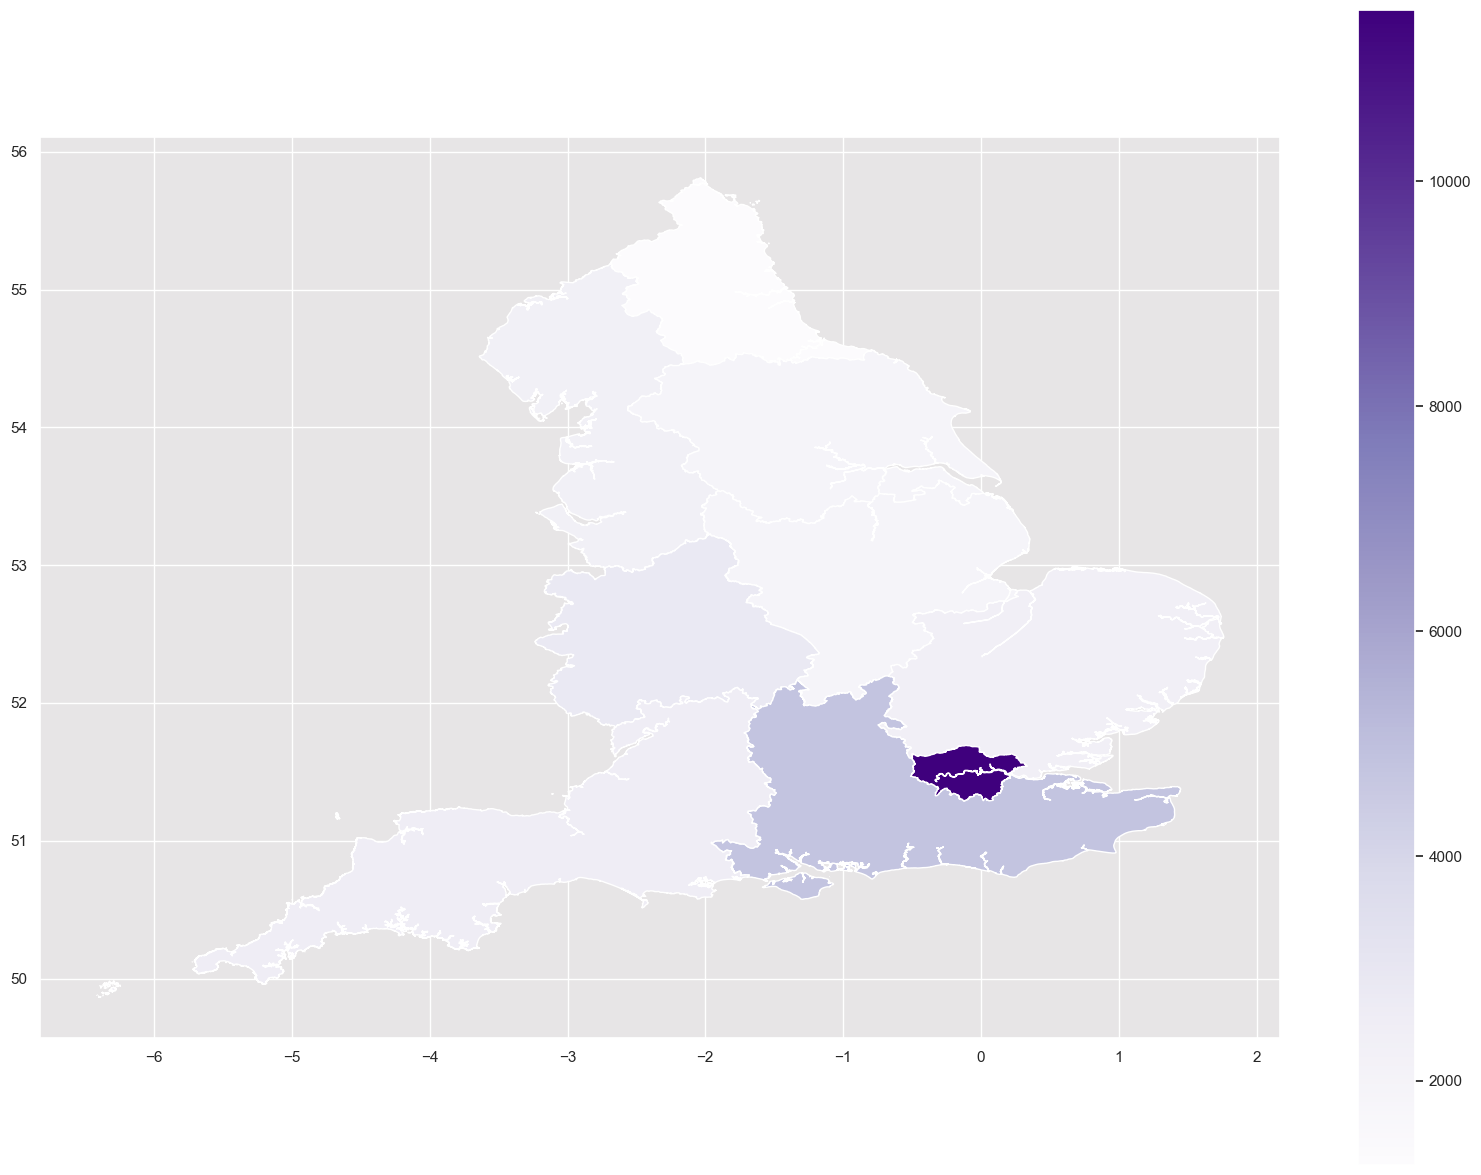

In [ ]:
'''geo_total_chargers.plot(column='ChargingDevices',figsize=(20,15),cmap='Purples',legend=True)'''